# Load data

You must first load the data and create a datetime index.

    1. Convert the date column to datetime dtype.
    2. Set the date column as the index.
    3. Filter out only the required data:
        - Keep only data from the year 2000 or later.
        - Keep only the following features:
            - precipitation
            - mean_temp
            - min_temp
            - max_temp
            - snow_depth
    4. Impute any missing values.
        - Think about each feature and what imputation method makes sense. 
          You may not be able to use the same method for every feature!


In [40]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# Call pd.read_csv to make dataframe
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Changing date data type to datetime

In [3]:
df['date']=pd.to_datetime(df['date'],format='%Y%m%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Setting date to index

In [4]:
df=df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Creating new dataframe with required columns

In [6]:
# making ne df with required columns
df1=df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']].copy()
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  14951 non-null  float64
 1   mean_temp      14922 non-null  float64
 2   min_temp       14955 non-null  float64
 3   max_temp       14951 non-null  float64
 4   snow_depth     13589 non-null  float64
dtypes: float64(5)
memory usage: 719.1 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0


## Setting the frequency

In [8]:
#calling .index to look at freqency
df1.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [14]:
#calling .asfreq() to set frequency
df1=df1.asfreq('D')
df1.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq='D')

## < 2000

In [15]:
#using properties of datetime to get years wanted
df2=df1.loc['1979':'2000']
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8036 entries, 1979-01-01 to 2000-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  8013 non-null   float64
 1   mean_temp      8013 non-null   float64
 2   min_temp       8013 non-null   float64
 3   max_temp       8013 non-null   float64
 4   snow_depth     8013 non-null   float64
dtypes: float64(5)
memory usage: 376.7 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0


## Missing values
    - Using interpolate

In [16]:
#Calling .isna().sum() for count on na's
df2.isna().sum()

precipitation    23
mean_temp        23
min_temp         23
max_temp         23
snow_depth       23
dtype: int64

In [17]:
#Calling interpolate to fill in na
ts_interp=df2.interpolate()
ts_interp.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Part 2

## Q1: What month had the most precipitation between 2000 through 2010?

### Slice out years wanted from df1

In [26]:
q=df1.loc['2000':'2010'].copy()
q.info()
q.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  3822 non-null   float64
 1   mean_temp      3794 non-null   float64
 2   min_temp       3822 non-null   float64
 3   max_temp       3822 non-null   float64
 4   snow_depth     2969 non-null   float64
dtypes: float64(5)
memory usage: 188.3 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


### Slice out precipitation as its own value

In [28]:
q1=q['precipitation'].copy()
q1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq='D')

### Set frequency as monthly

In [29]:
q1_M=q1.resample('M').sum().copy()
q1_M.name='resample'
q1_M.head()

date
2000-01-31    14.3
2000-02-29    62.2
2000-03-31    13.4
2000-04-30    71.8
2000-05-31    68.4
Freq: M, Name: resample, dtype: float64

### Address null values

In [31]:
q1_M.isna().sum()

0

### Max precipitation

In [33]:
maxp=q1_M.idxmax()
maxp

Timestamp('2009-11-30 00:00:00', freq='M')

In [34]:
q1_M.loc[maxp]

138.4

# Graph

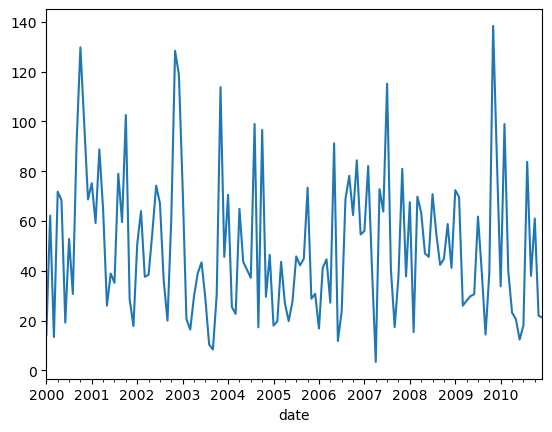

In [32]:
q1_M.plot();

TypeError: 'locator' must be an instance of matplotlib.ticker.Locator, not a pandas._libs.tslibs.timestamps.Timestamp

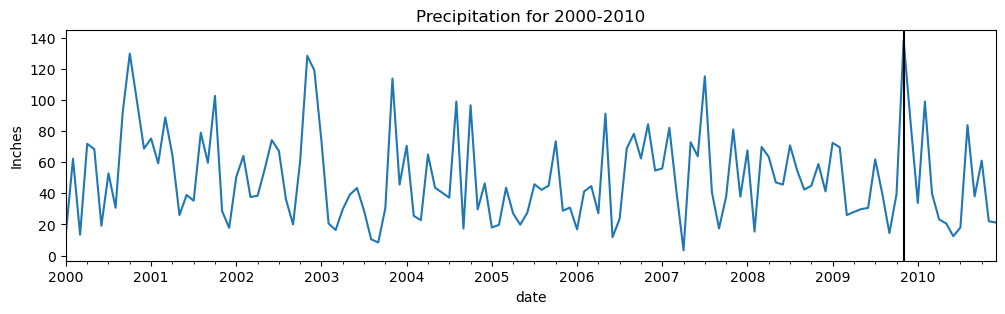

In [50]:
fig, ax = plt.subplots(figsize=(12,3))
q1_M.plot(ax=ax,title='Precipitation for 2000-2010')
ax.set_ylabel("Inches")
ax.axvline(maxp,color='k')
ax.xaxis.set_major_locator(maxp)
ax.xaxis.set_major_formatter(maxp)
fig.autofmt_xdate(rotation=90,ha='center')

## Q2: Which year between 2000-2020 had the coolest average temperature?

### Slice out the years wanted 2000-2020 using .loc on datetime index

In [51]:
q2=df1['2000':'2020'].copy()
q2.info()
q2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Freq: D
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


### Slice out temp column into varible

In [52]:
q3=q2['mean_temp'].copy()
q3.info()
q3.head()

<class 'pandas.core.series.Series'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Freq: D
Series name: mean_temp
Non-Null Count  Dtype  
--------------  -----  
7252 non-null   float64
dtypes: float64(1)
memory usage: 119.9 KB


date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Freq: D, Name: mean_temp, dtype: float64

### Set frequency to yearly and get agg .mean()

In [53]:
q3_A=q3.resample('A').mean().copy()
q3_A.name="resample"
q3_A.head()

date
2000-12-31    11.532070
2001-12-31    11.313006
2002-12-31    12.006286
2003-12-31    12.232764
2004-12-31    11.872046
Freq: A-DEC, Name: resample, dtype: float64

In [54]:
mint=q3_A.idxmin()
mint

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [55]:
q3_A.loc[mint]

10.645772594752186